In [2]:
pip install xgboost

In [3]:
import xgboost as xgb

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek # Estas 3 últimas librerías sirven para generar datos sintéticos

In [6]:
# 1. Carga del dataset
df = pd.read_csv('/content/Data/airlines_delay_balanceo_sin.csv')

In [7]:
# 2. Análisis Exploratorio de Datos (EDA)
print(df.head())

print(df.info())

print(df.describe())

   Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class
0  2313.0  1296.0   141.0      DL         ATL       HOU          1      0
1  6948.0   360.0   146.0      OO         COS       ORD          4      0
2  1247.0  1170.0   143.0      B6         BOS       CLT          3      0
3    31.0  1410.0   344.0      US         OGG       PHX          6      0
4   563.0   692.0    98.0      FL         BMI       ATL          4      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539299 entries, 0 to 539298
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539299 non-null  float64
 1   Time         539299 non-null  float64
 2   Length       539299 non-null  float64
 3   Airline      539299 non-null  object 
 4   AirportFrom  539299 non-null  object 
 5   AirportTo    539299 non-null  object 
 6   DayOfWeek    539299 non-null  int64  
 7   Class        539299 non-null  int64  
dtypes: float64(

In [8]:
# Verificar valores faltantes
print(df.isnull().sum())

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64


Codifico las variables categoricas

In [9]:

# Con el fin de analizar la correlación entre las caracteristicas se realiza encode de las columnas categoricas
label_encoders = {}
columns_to_encode = ['Airline','AirportFrom','AirportTo']

for column in columns_to_encode:
    le = LabelEncoder()
    df[column + 'encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le

df.tail()

#Label encoder :Codificación de variables categóricas
#df = pd.get_dummies(df, columns=['Airline', 'AirportFrom', 'AirportTo'], drop_first=True)
#df.tail()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,Airlineencoded,AirportFromencoded,AirportToencoded
539294,2419.0,866.0,189.0,DL,LGA,MSP,3,1,5,159,197
539295,5358.0,785.0,125.0,EV,ATL,SYR,4,1,6,16,273
539296,1587.0,500.0,65.0,WN,DAL,SAT,4,1,15,75,244
539297,1185.0,995.0,200.0,WN,DEN,BWI,4,1,15,79,45
539298,4003.0,815.0,101.0,9E,MEM,OKC,4,1,0,177,204


In [10]:
# Verificar duplicados
print(df.duplicated().sum())

#eliminacion de datos duplicados
#df_sin_duplicados = df.drop_duplicates()
#print(df_sin_duplicados.duplicated().sum())

216571


In [11]:
df.columns

Index(['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'Class', 'Airlineencoded', 'AirportFromencoded',
       'AirportToencoded'],
      dtype='object')

In [13]:

# Quitar columnas que no se van a utilizar
df = df.drop(columns=['Airline', 'AirportFrom', 'AirportTo'])
df.columns

Index(['Flight', 'Time', 'Length', 'DayOfWeek', 'Class', 'Airlineencoded',
       'AirportFromencoded', 'AirportToencoded'],
      dtype='object')

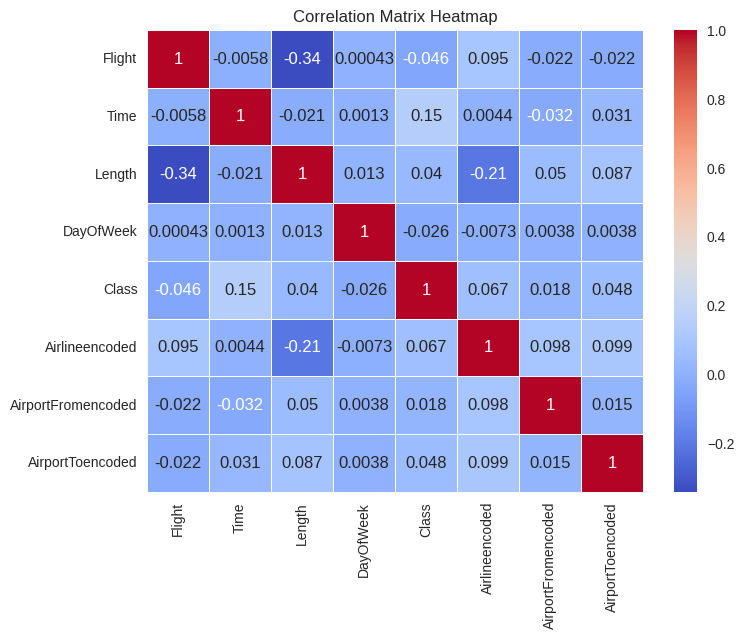

In [14]:
#Correlación
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Balanceo de clase

In [15]:
# Guardar una copia del dataset original para demostrar que no cambia
data_original = df.copy()

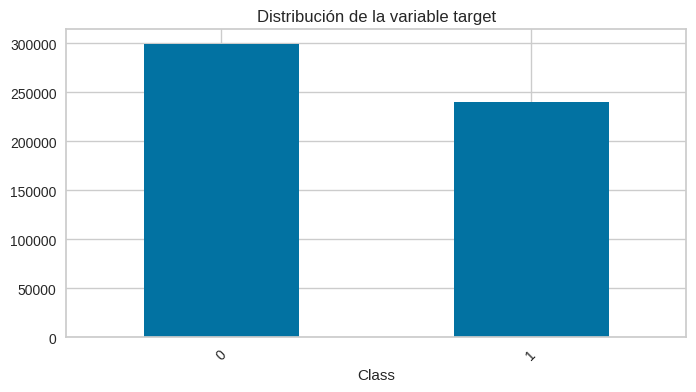

In [16]:
# Paso 2: Análisis de la distribución de la variable target
plt.figure(figsize=(8, 4))
df["Class"].value_counts().plot(kind="bar", title="Distribución de la variable target")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Paso 3: Identificar si hay desbalance
class_distribution = df["Class"].value_counts()
print("Distribución de clases antes del balanceo:")
print(class_distribution)

Distribución de clases antes del balanceo:
Class
0    299118
1    240181
Name: count, dtype: int64


In [18]:
# Separar características y variable objetivo
x = df.drop('Class', axis=1)
y = df['Class']

# Visualizacion de datos

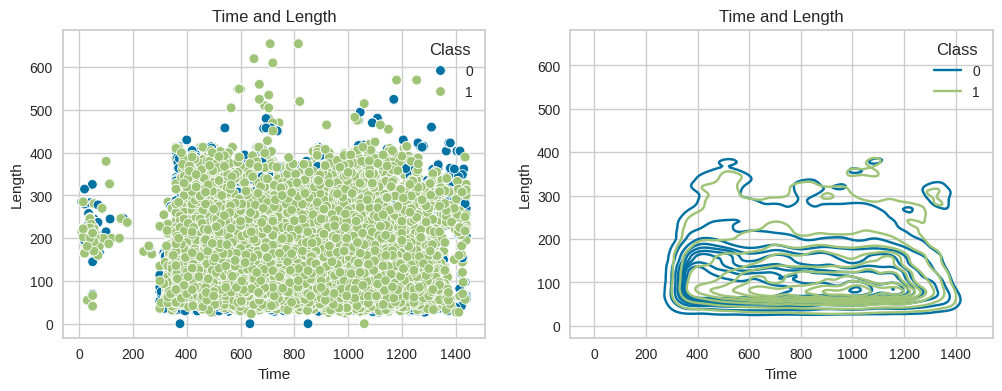

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Time and Length')
sns.scatterplot(x=df['Time'],y=df['Length'],hue=df['Class']);
plt.subplot(1,2,2)
plt.title('Time and Length')
sns.kdeplot(x=df['Time'],y=df['Length'],hue=df['Class']);

<Axes: xlabel='Time', ylabel='Class'>

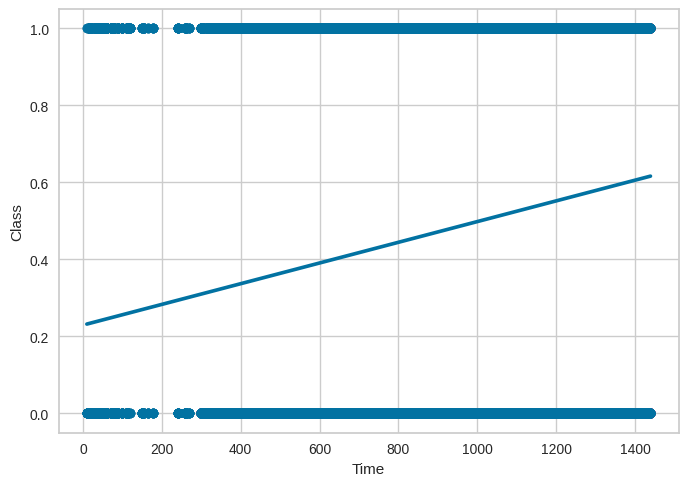

In [ ]:
# Checkear la correlación entre las caracteristicas independiente como (Tiempo) y la variable objetivo (Class)
sns.regplot(x = 'Time', y = 'Class', data=df, ci=None)

In [20]:
# Separar características y variable objetivo
x = df.drop('Class', axis=1)
y = df['Class']
print(x)
print(y)


        Flight    Time  Length  DayOfWeek  Airlineencoded  AirportFromencoded  \
0       2313.0  1296.0   141.0          1               5                  16   
1       6948.0   360.0   146.0          4              12                  65   
2       1247.0  1170.0   143.0          3               3                  35   
3         31.0  1410.0   344.0          6              14                 203   
4        563.0   692.0    98.0          4               8                  32   
...        ...     ...     ...        ...             ...                 ...   
539294  2419.0   866.0   189.0          3               5                 159   
539295  5358.0   785.0   125.0          4               6                  16   
539296  1587.0   500.0    65.0          4              15                  75   
539297  1185.0   995.0   200.0          4              15                  79   
539298  4003.0   815.0   101.0          4               0                 177   

        AirportToencoded  


se divide el dataset en dos, una parte para entrenar y una pequeña parte para datos reales

In [21]:
# División del dataset en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Random Forest

In [22]:
#generacion de archivo peakle
pickle.dump(rf_model,open('/content/Data/retraso_aerolinea.pkl','wb'))

# load model

model=pickle.load(open('/content/Data/retraso_aerolinea.pkl','rb'))
print(model.predict([[2487,885,163,4,5,16,197],[815,420.0,93.0,2,7,79,172]]))

NameError: name 'rf_model' is not defined

In [ ]:
# load model

model=pickle.load(open('/content/Data/retraso_aerolinea.pkl','rb'))
print(model.predict([[31,1296,141.0,1,5,16,129]]))


[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# XGBoost

Accuracy: 0.6700
              precision    recall  f1-score   support

           0       0.67      0.79      0.73     59784
           1       0.67      0.52      0.59     48076

    accuracy                           0.67    107860
   macro avg       0.67      0.66      0.66    107860
weighted avg       0.67      0.67      0.66    107860



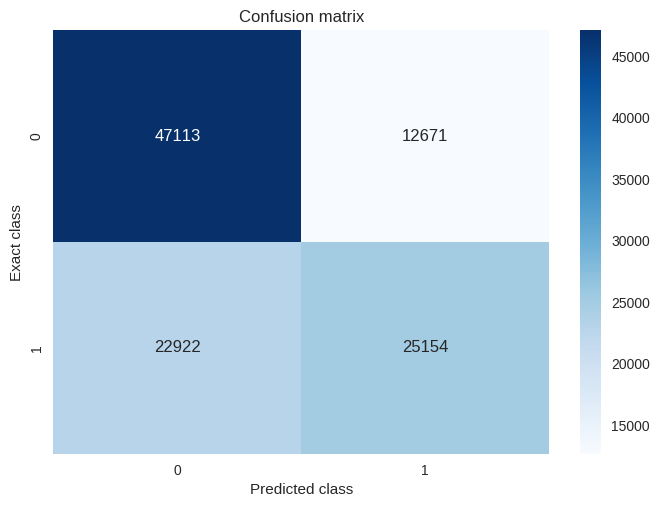

In [24]:
#Crear el modelo XGBoost
model = xgb.XGBClassifier(eta = 0.3, n_estimators = 300,
    max_depth = 7,
    subsample = 0.9,
    colsample_bytree = 0.5,
    gamma = 0,
    alpha = 0,
    learning_rate = 0.2,
    scale_pos_weight = 1,
    objective = 'binary:logistic',
    eval_metric = 'logloss', random_state=42)

# Entrenar el modelo
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)

confus_matrix = confusion_matrix(y_test,y_pred)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class')
serie = pd.Series(accuracy,index=['XGB'])
accuracy_XGBmodel = pd.DataFrame({'accuracy':serie})
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(x_train, y_train)

# Mejores parámetros encontrados
print(f'Mejores parámetros: {grid_search.best_params_}')

# Evaluar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy con mejores parámetros: {accuracy_best:.4f}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Accuracy con mejores parámetros: 0.6626


In [25]:
#generacion de archivo peakle
pickle.dump(model,open('/content/Data/retraso_aerolinea.pkl','wb'))

# load model

model=pickle.load(open('/content/Data/retraso_aerolinea.pkl','rb'))
print(model.predict([[2487,885,163,4,5,16,197],[815,420.0,93.0,2,7,79,172]]))

[1 0]


# Comparación del rendimiento de cada uno de los algoritmos utilizados

In [26]:
accuracy_models = pd.concat([accuracy_XGBmodel])
accuracy_models

,accuracy
XGB,0.670007
